# EDA FINAL PROJECT

### Data Research Analyst

### Student: Rina Rafalski

### Mentor: Alon Tam

# <a id="index">Table of Contents:</a>  

1. [About S&P 500 data set](#about)<br>
2. [Initial Research Questions](#init_queststions)<br>
3. [Data Pre-processing](#prep)<br>
    3.1 [Importing Libraries & Modules](#lib)<br>
    3.2 [Companies Subset - Overview](#companies_subset_overview)<br>
    3.3 [Companies Subset - Handling Missing Values](#companies_null)<br>
    3.4 [Companies Subset - Checking Categorical Values](#companies_cat)<br>
    3.5 [Stocks Subset - Overview](#stocks_subset_overview)<br> 
    3.6 [Stocks Subset - Handling Missing Values](#stocks_null)<br>
    3.7 [S&P 500 Index Subset - Overview](#index_subset_overview)<br>     
4. [Exploratory Data Analysis](#analysis)<br>
    4.1 [Trends in Stock Prices and Trading Volumes](#quest1)<br>
    4.2 [Performance of the S&P 500 Index](#quest2)<br>
    4.3 [Growth Trends by Sectors](#quest3)<br>
    4.4 [Industries Performance vs Overall S&P 500 Index](#quest4)<br>
    4.5 [Market capitalization and revenue growth correlation with long-term stock performance](#quest5)<br>
    4.6 [Top-performing companies](#quest6)<br>
    4.7 [Risk profiles of top-performing companies](#quest7)<br>
    4.8 [Impact of Market Weight on Returns](#quest8)<br>
5. [Summary](#summary)<br>    

# 1. <a id="about">About S&P 500 dataset</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_stocks.csv


The Standard and Poor's 500 or S&P 500 is the most famous financial benchmark in the world. It tracks the largest 500 publicly traded U.S. companies. Investors have long used the S&P 500 as a benchmark for their investments as it tends to signal overall market health. The S&P 500 is a “free-floating index” meaning that it only takes into consideration the health and price of shares that are publicly traded; it does not consider government-owned or privately-owned shares. The index is a popular choice for long-term investors who wish to watch growth over the coming decades.

Because the index includes multiple classes of stock of some constituent companies—for example, Alphabet's Class A (GOOGL) and Class C (GOOG) - there are actually 505 stocks in the gauge.

### Dataset description
The dataset combines 3 subsets, each in separate csv files:

#### 1) The companies subset - sp500_companies.csv
- Contains details about S&P 500 companies, including symbol, name, sector, industry, market cap, revenue growth, and other financial metrics, consists of 503 rows and 16 columns:
- **Exchange**: The stock exchange where the company is listed.
- **Symbol**: The stock ticker symbol.
- **Shortname**: The short name of the company.
- **Longname**: The full name of the company.
- **Sector**: The sector to which the company belongs.
- **Industry**: The industry within the sector.
- **Currentprice**: The current price of the stock.
- **Marketcap**: The market capitalization of the company, it is calculated as $Current\:Price \times Outstanding\:shares$ 
- **Ebitda**: Earnings before interest, taxes, depreciation, and amortization, it is calculated as $EBITDA\: = Net\:Income + Interest + Taxes + Depreciation + Amortization$
- **Revenuegrowth**: The revenue growth rate of the company, it is calculated as $\dfrac {Current\:Period\:Sales - Prior\:Period\:Sales}{Prior\:Period\:Sales}$ 
- **City**: The city where the company is headquartered.
- **State**: The state where the company is headquartered.
- **Country**: The country where the company is headquartered.
- **Fulltimeemployees**: The number of full-time employees.
- **Longbusinesssummary**: A detailed summary of the company's business.
- **Weight**: The weight of the company in the S&P 500 index, where weight of each stock is calculated as $\dfrac{Company\:marker\:cap}{Total\:of\:all\:market\:cap}$   

#### 2) The stocks subset - sp500_stocks.csv
Contains daily stock prices for each company that included in S&P 500 index. The subset consists 1843998 rows and 8 columns:  
-  **Date**: the date from 2010-01-04 to 2024-07-29 
- **Symbol**: Company Symbol/Ticker
- **Adj Close**: Similar to the price at market closure, yet also takes into account company actions such as dividends and splits
- **Close**: Price at market closure
- **High**: Maximum value of period
- **Low**: Minimum value of period
- **Open**: Price at market opening
- **Volume**: Volume traded

#### 3) The index subset - sp500_index.csv
Contains daily S&P 500 index, consists of 2517 rows and 2 columns    
The index subset contains 2517 rows and 2 columns:
-  **Date**: the date from 2014-07-28 to 2024-07-26
- **S&P500**: S&P500 index


# 2. <a id="init_queststions">Initial Research Questions</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
1. What are the trends in stock prices and trading volumes for S&P 500 companies over the last 10 years (2014-2023)?
2. What are the historical performance and growth trends of the S&P 500 index as a whole?
3. Which sectors have shown the most consistent growth?    
4. How do specific industries within the S&P 500 perform compared to the overall index?
5. How does the market capitalization and revenue growth of S&P 500 companies correlate with long-term stock performance?
6. What are the top-performing companies in terms of revenue growth and market capitalization?
7. What are the historical volatility and risk profiles of top-performing companies?
8. How does a company’s weight in the S&P 500 influence its long-term returns? Do higher-weight companies tend to perform better?

# 3. <a id="prep">Data Overview & Pre-processing</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [1]:
# pip install yfinance --upgrade --no-cache-dir

In [2]:
# pip install --upgrade scipy

## 3.1. <a id="lib">Importing Libraries and Modules</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [3]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# stocks related missing info
import yfinance as yf

# ignoring the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

## 3.2. <a id="companies_subset_overview">Companies Subset Overview</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [4]:
# Load the SP500_Comp dataframe
SP500_Comp = pd.read_csv('sp500_companies.csv')
SP500_Comp.sample(5)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
45,NMS,INTU,Intuit Inc.,Intuit Inc.,Technology,Software - Application,636.36,177892524032,4.423000e+09,0.410,Mountain View,CA,United States,18200.0,Intuit Inc. provides financial management and ...,0.003495
184,NMS,CPRT,"Copart, Inc.","Copart, Inc.",Industrials,Specialty Business Services,51.05,49125310464,1.780915e+09,0.103,Dallas,TX,United States,12000.0,"Copart, Inc. provides online auctions and vehi...",0.000965
193,NYQ,TEL,TE Connectivity Ltd. New Switze,TE Connectivity Ltd.,Technology,Electronic Components,155.77,47423397888,3.706000e+09,-0.005,Schaffhausen,NaN,Switzerland,85000.0,"TE Connectivity Ltd., together with its subsid...",0.000932
66,NYQ,UBER,"Uber Technologies, Inc.","Uber Technologies, Inc.",Technology,Software - Application,63.76,133227790336,2.354000e+09,0.148,San Francisco,CA,United States,30700.0,"Uber Technologies, Inc. develops and operates ...",0.002617
468,NYQ,RL,Ralph Lauren Corporation,Ralph Lauren Corporation,Consumer Cyclical,Apparel Manufacturing,173.53,10872539136,1.024900e+09,0.018,New York,NY,United States,14800.0,"Ralph Lauren Corporation designs, markets, and...",0.000214


In [5]:
# Defining custom function to display basic information about the dataset 
# including shape, datatypes, statistics, null values.
def basic_info(df):
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())
    print("="*50)
    print(f'Missing values in any of the columns this dataset are\n{df.isnull().sum(axis=0)}')
    
# Calling the custom function to display basic_info of Companies subset    
basic_info(SP500_Comp)

Shape of this dataset is (503, 16).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        501 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    499 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weig

##### *Observations:*
- The shape of this dataframe is (503, 16) i.e., 503 records or observations with 16 features
- Columns with null (missing) values
       - Ebitda: 29
       - Revenurgrowth: 2
       - State: 20
       - Fulltimeemplyees: 4
- There doesn't seem to be a column where the datatype needs to be modified.

## 3.3 <a id="companies_null">Companies Subset - Handling Missing Values</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### Missing States
The "States" column that has missing values will be removed as it will not be used for EDA

In [6]:
SP500_Comp[SP500_Comp['State'].isnull()].sample(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
201,NYQ,JCI,Johnson Controls International,Johnson Controls International plc,Industrials,Building Products & Equipment,69.30,46685749248,2.963000e+09,0.002,Cork,NaN,Ireland,100000.0,"Johnson Controls International plc, together w...",0.000917
261,NYQ,GRMN,Garmin Ltd.,Garmin Ltd.,Technology,Scientific & Technical Instruments,176.56,33913290752,1.372570e+09,0.204,Schaffhausen,NaN,Switzerland,19900.0,"Garmin Ltd. designs, develops, manufactures, m...",0.000666
377,NYQ,APTV,Aptiv PLC,Aptiv PLC,Consumer Cyclical,Auto Parts,68.90,18745073664,2.871000e+09,0.017,Dublin,NaN,Ireland,154000.0,"Aptiv PLC engages in design, manufacture, and ...",0.000368


In [7]:
SP500_Comp = SP500_Comp.drop(['State'], axis=1)

In [8]:
SP500_Comp.head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,218.24,3346514051072,1.296290e+11,-0.043,Cupertino,United States,150000.0,"Apple Inc. designs, manufactures, and markets ...",0.065748
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,426.73,3171589554176,1.259820e+11,0.170,Redmond,United States,221000.0,Microsoft Corporation develops and supports so...,0.062311
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,111.59,2744924241920,4.927500e+10,2.621,Santa Clara,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.053929


#### Missing Revenue Growth

In [9]:
SP500_Comp[SP500_Comp['Revenuegrowth'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
157,NYQ,TFC,Truist Financial Corporation,Truist Financial Corporation,Financial Services,Banks - Regional,44.46,59497263104,NaN,NaN,Charlotte,United States,41368.0,"Truist Financial Corporation, a financial serv...",0.001169
341,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,66.43,21691056128,-396000000.0,NaN,San Jose,United States,53000.0,"Western Digital Corporation develops, manufact...",0.000426


We can use Yahoo Finance to extract missing information, it'll be good to create a general function that automatically replaces the null values in these columns.
- [Official Documentation of yfinance module](https://pypi.org/project/yfinance/)
- [yfinance Library – A Complete Guide](https://algotrading101.com/learn/yfinance-guide/) by Greg Bland

In [10]:
def replace_null(df, sym, col, missing):
    ticker = yf.Ticker(sym)
    if missing in ticker.info:
        df.loc[df['Symbol']==sym, col] = ticker.info[missing]
    else:
        print(f"{missing} not found for {sym}")

replace_null(SP500_Comp, 'TFC', 'Revenuegrowth', 'revenueGrowth')
replace_null(SP500_Comp, 'WDC', 'Revenuegrowth', 'revenueGrowth')

revenueGrowth not found for TFC
revenueGrowth not found for WDC


revenueGrowth is not available in the data fetched from yfinance for TFC and WDC. As an alternative, we could check other fields in yfinance data and performs the calculation manually to find the revenue growth

In [11]:
# This function performs the calculation manually and can be used to find the revenue growth for any given stock symbol.

def calculate_revenue_growth(symbol):
    # Create a Ticker object for the given symbol
    ticker = yf.Ticker(symbol)

    # Get the quarterly financials
    financials = ticker.quarterly_financials

    # Check if 'Total Revenue' is in the index
    if 'Total Revenue' in financials.index:
        revenue_series = financials.loc['Total Revenue']
        
        # Drop NaN values
        revenue_series = revenue_series.dropna()
        
        # Ensure we have enough data points
        if len(revenue_series) >= 2:
            print("Historical Revenue Data:")
            print(revenue_series)
            
            # Verify calculation step by step
            current_period_sales = revenue_series.iloc[-1]
            prior_period_sales = revenue_series.iloc[-2]
            calculated_growth = (current_period_sales - prior_period_sales) / prior_period_sales
            
            print(f"Current Period Sales: {current_period_sales}")
            print(f"Prior Period Sales: {prior_period_sales}")
            print(f"Calculated Growth: {calculated_growth}")
            
            return calculated_growth
        else:
            print("Not enough data points to calculate revenue growth.")
            return None
    else:
        print(f"Total Revenue data not available for {symbol}")
        return None

# Example usage:
tfc_growth = calculate_revenue_growth('TFC')
wdc_growth = calculate_revenue_growth('WDC')

print(f"TFC Revenue Growth: {tfc_growth}")
print(f"WDC Revenue Growth: {wdc_growth}")


Historical Revenue Data:
2024-06-30   -1685000000.0
2024-03-31    4818000000.0
2023-12-31    5698000000.0
2023-09-30    5672000000.0
2023-06-30    4983000000.0
Name: Total Revenue, dtype: object
Current Period Sales: 4983000000.0
Prior Period Sales: 5672000000.0
Calculated Growth: -0.12147390691114246
Historical Revenue Data:
2024-06-30    3764000000.0
2024-03-31    3457000000.0
2023-12-31    3032000000.0
2023-09-30    2750000000.0
2023-06-30    2672000000.0
Name: Total Revenue, dtype: object
Current Period Sales: 2672000000.0
Prior Period Sales: 2750000000.0
Calculated Growth: -0.028363636363636365
TFC Revenue Growth: -0.12147390691114246
WDC Revenue Growth: -0.028363636363636365


In [12]:
# Replace missing 'Revenuegrowth' values for TFC and WDC
SP500_Comp.loc[SP500_Comp['Symbol'] == 'TFC', 'Revenuegrowth'] = tfc_growth
SP500_Comp.loc[SP500_Comp['Symbol'] == 'WDC', 'Revenuegrowth'] = wdc_growth

# Display the updated dataframe
SP500_Comp[SP500_Comp['Symbol'].isin(['TFC', 'WDC'])]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
157,NYQ,TFC,Truist Financial Corporation,Truist Financial Corporation,Financial Services,Banks - Regional,44.46,59497263104,NaN,-0.121474,Charlotte,United States,41368.0,"Truist Financial Corporation, a financial serv...",0.001169
341,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,66.43,21691056128,-396000000.0,-0.028364,San Jose,United States,53000.0,"Western Digital Corporation develops, manufact...",0.000426


#### Missing Fulltimeemployees

In [13]:
SP500_Comp[SP500_Comp['Fulltimeemployees'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
15,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,261.60,509042229248,2.438400e+10,0.096,San Francisco,United States,NaN,Visa Inc. operates as a payment technology com...,0.010001
93,NMS,KLAC,KLA Corporation,KLA Corporation,Technology,Semiconductor Equipment & Materials,778.54,104822620160,4.036656e+09,0.091,Milpitas,United States,NaN,"KLA Corporation designs, manufactures, and mar...",0.002059
279,NYQ,RMD,ResMed Inc.,ResMed Inc.,Healthcare,Medical Instruments & Supplies,208.54,30635986944,1.441419e+09,0.072,San Diego,United States,NaN,"ResMed Inc. develops, manufactures, distribute...",0.000602
340,NMS,STX,Seagate Technology Holdings PLC,Seagate Technology Holdings plc,Technology,Computer Hardware,103.38,21708660736,6.990000e+08,0.178,Dublin,Ireland,NaN,Seagate Technology Holdings plc provides data ...,0.000427


In [14]:
# Defining function that retrieves the number of full-time employees from Yahoo Finance using the yfinance library.
def get_fulltime_employees(symbol):
    ticker = yf.Ticker(symbol)
    fulltime_employees = ticker.info.get('fullTimeEmployees', 'Not available')
    return fulltime_employees

# List of symbols with missing 'Fulltimeemployees'
symbols_with_missing_employees = SP500_Comp[SP500_Comp['Fulltimeemployees'].isnull()]['Symbol']

# Retrieve and update the missing information
for symbol in symbols_with_missing_employees:
    fulltime_employees = get_fulltime_employees(symbol)
    if fulltime_employees != 'Not available':
        SP500_Comp.loc[SP500_Comp['Symbol'] == symbol, 'Fulltimeemployees'] = fulltime_employees
    else:
        print(f"Fulltimeemployees data not available for {symbol}")

# Display the updated dataframe
SP500_Comp[SP500_Comp['Symbol'].isin(symbols_with_missing_employees)]


Fulltimeemployees data not available for V


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
15,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,261.60,509042229248,2.438400e+10,0.096,San Francisco,United States,NaN,Visa Inc. operates as a payment technology com...,0.010001
93,NMS,KLAC,KLA Corporation,KLA Corporation,Technology,Semiconductor Equipment & Materials,778.54,104822620160,4.036656e+09,0.091,Milpitas,United States,15000.0,"KLA Corporation designs, manufactures, and mar...",0.002059
279,NYQ,RMD,ResMed Inc.,ResMed Inc.,Healthcare,Medical Instruments & Supplies,208.54,30635986944,1.441419e+09,0.072,San Diego,United States,9980.0,"ResMed Inc. develops, manufactures, distribute...",0.000602
340,NMS,STX,Seagate Technology Holdings PLC,Seagate Technology Holdings plc,Technology,Computer Hardware,103.38,21708660736,6.990000e+08,0.178,Dublin,Ireland,30000.0,Seagate Technology Holdings plc provides data ...,0.000427


As 3 of 4 missing Fulltimeemployees values are not available in the data fetched from yfinance, 
we replace it manually according to information that found in data sources below:

Symbol: **V** - Visa Inc. - approximately 28,800 according to [Annual Report 2023](https://annualreport.visa.com/business-overview/default.aspx) or [Stock Analysis 2023](https://stockanalysis.com/stocks/v/employees/)

Symbol: **KLAC** - KLAC Corporation - 15,000 according to [Stock Analysis 2023](https://stockanalysis.com/stocks/klac/employees/)

Symbol: **RMD** - ResMed Inc. - 10,140 according to [Stock Analysis 2023](https://stockanalysis.com/stocks/rmd/employees/)

Symbol: **STX** - Seagate Technology Holdings PLC - 33,400 according to [Stock Analysis 2023](https://stockanalysis.com/stocks/stx/employees/)

In [15]:
# Fill missing values manually with a values from public data sources above
SP500_Comp.loc[SP500_Comp['Symbol'] == 'V', 'Fulltimeemployees'] = 28800
SP500_Comp.loc[SP500_Comp['Symbol'] == 'KLAC', 'Fulltimeemployees'] = 15000
SP500_Comp.loc[SP500_Comp['Symbol'] == 'RMD', 'Fulltimeemployees'] = 10140
SP500_Comp.loc[SP500_Comp['Symbol'] == 'STX', 'Fulltimeemployees'] = 33400

In [16]:
SP500_Comp[SP500_Comp['Fulltimeemployees'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight


In [17]:
SP500_Comp[SP500_Comp['Symbol'].isin(['V', 'KLAC', 'RMD','STX'])]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
15,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,261.60,509042229248,2.438400e+10,0.096,San Francisco,United States,28800.0,Visa Inc. operates as a payment technology com...,0.010001
93,NMS,KLAC,KLA Corporation,KLA Corporation,Technology,Semiconductor Equipment & Materials,778.54,104822620160,4.036656e+09,0.091,Milpitas,United States,15000.0,"KLA Corporation designs, manufactures, and mar...",0.002059
279,NYQ,RMD,ResMed Inc.,ResMed Inc.,Healthcare,Medical Instruments & Supplies,208.54,30635986944,1.441419e+09,0.072,San Diego,United States,10140.0,"ResMed Inc. develops, manufactures, distribute...",0.000602
340,NMS,STX,Seagate Technology Holdings PLC,Seagate Technology Holdings plc,Technology,Computer Hardware,103.38,21708660736,6.990000e+08,0.178,Dublin,Ireland,33400.0,Seagate Technology Holdings plc provides data ...,0.000427


#### Missing EBITDA

In [18]:
SP500_Comp[SP500_Comp['Ebitda'].isnull()].sample(5)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
11,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,210.85,599889346560,NaN,0.320,New York,United States,313206.0,JPMorgan Chase & Co. operates as a financial s...,0.011786
353,NYQ,RF,Regions Financial Corporation,Regions Financial Corporation,Financial Services,Banks - Regional,22.43,20523786240,NaN,0.156,Birmingham,United States,20101.0,"Regions Financial Corporation, a financial hol...",0.000403
352,NYQ,WRB,W.R. Berkley Corporation,W. R. Berkley Corporation,Financial Services,Insurance - Property & Casualty,53.95,20535906304,NaN,0.106,Greenwich,United States,8329.0,"W. R. Berkley Corporation, an insurance holdin...",0.000403
369,NYQ,CFG,"Citizens Financial Group, Inc.","Citizens Financial Group, Inc.",Financial Services,Banks - Regional,43.00,19477364736,NaN,-0.071,Providence,United States,17510.0,"Citizens Financial Group, Inc. operates as the...",0.000383
339,NMS,HBAN,Huntington Bancshares Incorpora,Huntington Bancshares Incorporated,Financial Services,Banks - Regional,15.02,21815498752,NaN,-0.024,Columbus,United States,19889.0,Huntington Bancshares Incorporated operates as...,0.000429


EBITDA (earnings before interest, taxes, depreciation, and amortization) is a measure of profitability. The benefit of EBITDA is that it focuses on a company's core performance rather than the effects of non-core financial expenses.


In [19]:
# We can use Yahoo Finance To extract the missing values for Ebitda
def get_ebitda(symbol):
    ticker = yf.Ticker(symbol)
    ebitda = ticker.info.get('ebitda', 'Not available')
    return ebitda

# List of symbols with missing 'Ebitda'
symbols_with_missing_ebitda = SP500_Comp[SP500_Comp['Ebitda'].isnull()]['Symbol']

# Retrieve and update the missing information
for symbol in symbols_with_missing_ebitda:
    ebitda = get_ebitda(symbol)
    if ebitda != 'Not available':
        SP500_Comp.loc[SP500_Comp['Symbol'] == symbol, 'Ebitda'] = ebitda
    else:
        print(f"Ebitda data not available for {symbol}")

# Display the updated dataframe
print(SP500_Comp[SP500_Comp['Symbol'].isin(symbols_with_missing_ebitda)])

Ebitda data not available for JPM
Ebitda data not available for BAC
Ebitda data not available for WFC
Ebitda data not available for AXP
Ebitda data not available for BX
Ebitda data not available for MS
Ebitda data not available for GS
Ebitda data not available for C
Ebitda data not available for SCHW
Ebitda data not available for KKR
Ebitda data not available for PNC
Ebitda data not available for USB
Ebitda data not available for TFC
Ebitda data not available for COF
Ebitda data not available for BK
Ebitda data not available for AMP
Ebitda data not available for DFS
Ebitda data not available for MTB
Ebitda data not available for FITB
Ebitda data not available for STT
Ebitda data not available for RJF
Ebitda data not available for HBAN
Ebitda data not available for WRB
Ebitda data not available for RF
Ebitda data not available for SYF
Ebitda data not available for CFG
Ebitda data not available for NTRS
Ebitda data not available for EG
Ebitda data not available for KEY
    Exchange Symbo

As EBITDA missing values are not available in the data fetched from yfinance, we can use an estimate based on other financial metrics available. As we can see, all missing EBITDA are all from the Financial Services:

In [20]:
# Grouping missing EBITDA values by Sector and Industry:
missing_EBITDA = SP500_Comp[SP500_Comp['Ebitda'].isnull()]
count_EBITDA = missing_EBITDA.groupby(['Sector', 'Industry'])['Industry'].count()
count_EBITDA

Sector              Industry                       
Financial Services  Asset Management                   6
                    Banks - Diversified                4
                    Banks - Regional                   9
                    Capital Markets                    4
                    Credit Services                    4
                    Insurance - Property & Casualty    1
                    Insurance - Reinsurance            1
Name: Industry, dtype: int64

As all missing EBITDA are all from the Financial Services, we can estimate Ebitda for the Financial Services sector using median values from the available data in the same sector:

In [21]:
# Extract available Ebitda data for Financial Services sector
financial_services = SP500_Comp[SP500_Comp['Sector'] == 'Financial Services']
available_ebitda = financial_services[financial_services['Ebitda'].notnull()]['Ebitda']

# Create a flag column for missing Ebitda
SP500_Comp['Ebitda_missing'] = SP500_Comp['Ebitda'].isnull()

# Calculate the median Ebitda value
median_ebitda = available_ebitda.median()
print(f"Median Ebitda for Financial Services: {median_ebitda}")

# Replace missing Ebitda values with the median value
SP500_Comp.loc[(SP500_Comp['Sector'] == 'Financial Services') & (SP500_Comp['Ebitda'].isnull()), 'Ebitda'] = median_ebitda

# Display the updated dataframe with the flag
print(SP500_Comp[SP500_Comp['Symbol'].isin(symbols_with_missing_ebitda)][['Symbol', 'Ebitda', 'Ebitda_missing']])


Median Ebitda for Financial Services: 3274800128.0
    Symbol        Ebitda  Ebitda_missing
11     JPM  3.274800e+09            True
24     BAC  3.274800e+09            True
36     WFC  3.274800e+09            True
47     AXP  3.274800e+09            True
50      BX  3.274800e+09            True
55      MS  3.274800e+09            True
57      GS  3.274800e+09            True
77       C  3.274800e+09            True
80    SCHW  3.274800e+09            True
91     KKR  3.274800e+09            True
127    PNC  3.274800e+09            True
132    USB  3.274800e+09            True
157    TFC  3.274800e+09            True
162    COF  3.274800e+09            True
190     BK  3.274800e+09            True
216    AMP  3.274800e+09            True
255    DFS  3.274800e+09            True
287    MTB  3.274800e+09            True
289   FITB  3.274800e+09            True
310    STT  3.274800e+09            True
324    RJF  3.274800e+09            True
339   HBAN  3.274800e+09            True
352   

Companies subset info after handling missing values:

In [22]:
# Calling the custom function to display basic_info of Companies subset after handling missing values   
basic_info(SP500_Comp)

Shape of this dataset is (503, 16).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               503 non-null    float64
 9   Revenuegrowth        503 non-null    float64
 10  City                 503 non-null    object 
 11  Country              503 non-null    object 
 12  Fulltimeemployees    503 non-null    float64
 13  Longbusinesssummary  503 non-null    object 
 14  Weight               503 non-null    float64
 15  Ebit

## 3.4. <a id="companies_cat">Companies subset - Checking the categorical values</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [23]:
# Identify categorical columns
categorical_columns = SP500_Comp.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = SP500_Comp[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values[0:10])
    print("\n")

Unique values for column 'Exchange':
['NMS' 'NYQ' 'BTS' 'NGM']


Unique values for column 'Symbol':
['AAPL' 'MSFT' 'NVDA' 'GOOGL' 'GOOG' 'AMZN' 'META' 'BRK-B' 'TSLA' 'LLY']


Unique values for column 'Shortname':
['Apple Inc.' 'Microsoft Corporation' 'NVIDIA Corporation' 'Alphabet Inc.'
 'Amazon.com, Inc.' 'Meta Platforms, Inc.' 'Berkshire Hathaway Inc. New'
 'Tesla, Inc.' 'Eli Lilly and Company' 'Broadcom Inc.']


Unique values for column 'Longname':
['Apple Inc.' 'Microsoft Corporation' 'NVIDIA Corporation' 'Alphabet Inc.'
 'Amazon.com, Inc.' 'Meta Platforms, Inc.' 'Berkshire Hathaway Inc.'
 'Tesla, Inc.' 'Eli Lilly and Company' 'Broadcom Inc.']


Unique values for column 'Sector':
['Technology' 'Communication Services' 'Consumer Cyclical'
 'Financial Services' 'Healthcare' 'Consumer Defensive' 'Energy'
 'Basic Materials' 'Industrials' 'Utilities']


Unique values for column 'Industry':
['Consumer Electronics' 'Software - Infrastructure' 'Semiconductors'
 'Internet Content & Informat

## 3.5. <a id="stocks_subset_overview">Stocks Subset Overview</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [24]:
# Load the SP500_Stocks dataframe
SP500_Stocks = pd.read_csv('sp500_stocks.csv')
SP500_Stocks.sample(5)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1821388,2022-02-16,WYNN,93.034828,94.230003,95.669998,91.879997,93.269997,4118900.0
376212,2019-01-25,SCHW,44.285252,47.970001,48.230000,47.549999,48.150002,7786800.0
1664954,2012-05-07,TFC,20.751858,31.870001,32.000000,31.469999,31.570000,3186900.0
1725377,2019-05-16,VRSN,196.830002,196.830002,199.410004,194.470001,194.470001,611600.0
716076,2014-10-17,FIS,45.471901,53.410000,53.700001,52.680000,52.970001,1566200.0


In [25]:
# Calling the custom function to display basic_info of Stocks subset  
basic_info(SP500_Stocks)

Shape of this dataset is (1843998, 8).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843998 entries, 0 to 1843997
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 112.5+ MB
None
          Adj Close         Close          High           Low          Open  \
count  1.749119e+06  1.749119e+06  1.749119e+06  1.749119e+06  1.749119e+06   
mean   9.624929e+01  1.032068e+02  1.043357e+02  1.020218e+02  1.031873e+02   
std    2.034577e+02  2.035245e+02  2.059044e+02  2.010800e+02  2.034474e+02   
min    2.036243e-01  2.220000e-01  2.262500e-01  2.162500e-01  2.180000e-01   
25%    2.905012e+01  3.479000e+01  3.516726e+01  3.439000e+01  3.478000e+01   
50%    5.358330e+01  6.212000e+01  6.275000e+01  6.145000e+01  6.210000e+01 

##### *Observations:*
- The shape of stocks dataframe is (1843998, 8) i.e., 1843998 records or observations with 8 features
- Columns with null (missing) values
       - Adj Close    94879
       - Close        94879
       - High         94879
       - Low          94879
       - Open         94879
       - Volume       94879
- The datatype of column Date should modofied from Object to Date.

## 3.6. <a id="stocks_null">Stocks Subset - Handling Missing Values</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [26]:
SP500_Stocks[SP500_Stocks.Low.isnull()]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
10998,2010-01-04,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
10999,2010-01-05,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
11000,2010-01-06,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
11001,2010-01-07,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
11002,2010-01-08,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1841102,2013-01-25,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1841103,2013-01-28,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1841104,2013-01-29,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1841105,2013-01-30,ZTS,NaN,NaN,NaN,NaN,NaN,NaN


Since the rows with missing values contain only the date and symbol, and no numerical data, dropping these rows would be an efficient method to maintain the integrity of the data for further analysis. These rows do not contribute any useful information for time series analysis and can be safely removed.

In [27]:
# Drop rows where all numeric columns are NaN
SP500_Stocks.dropna(subset=['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], how='all', inplace=True)

# Calling the custom function to display basic_info of Stocks subset after handling missing values   
basic_info(SP500_Stocks)

Shape of this dataset is (1749119, 8).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749119 entries, 0 to 1843997
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 120.1+ MB
None
          Adj Close         Close          High           Low          Open  \
count  1.749119e+06  1.749119e+06  1.749119e+06  1.749119e+06  1.749119e+06   
mean   9.624929e+01  1.032068e+02  1.043357e+02  1.020218e+02  1.031873e+02   
std    2.034577e+02  2.035245e+02  2.059044e+02  2.010800e+02  2.034474e+02   
min    2.036243e-01  2.220000e-01  2.262500e-01  2.162500e-01  2.180000e-01   
25%    2.905012e+01  3.479000e+01  3.516726e+01  3.439000e+01  3.478000e+01   
50%    5.358330e+01  6.212000e+01  6.275000e+01  6.145000e+01  6.210000e+01 

## 3.7. <a id="index_subset_overview">S&P 500 Index Subset Overview</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [28]:
# Load the SP500_Index dataframe
SP500_Index = pd.read_csv('sp500_index.csv')
SP500_Index.sample(5)

,Date,S&P500
1591,2020-11-18,3567.79
1260,2019-07-30,3013.18
1317,2019-10-18,2986.20
1481,2020-06-15,3066.59
690,2017-04-24,2374.15


In [29]:
# Calling the custom function to display basic_info of Index subset  
basic_info(SP500_Index)

Shape of this dataset is (2517, 2).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB
None
            S&P500
count  2517.000000
mean   3192.727660
std     988.468374
min    1829.080000
25%    2278.870000
50%    2901.520000
75%    4109.110000
max    5667.200000
Missing values in any of the columns this dataset are
Date      0
S&P500    0
dtype: int64


##### *Observations:*
- The shape of this dataframe is (503, 16) i.e., 2517 records or observations with 2 features: Date and S&P500 Index value
- The subset has no missing values
- The datatype of column Date should modofied from Object to Date.

# 4. <a id="analysis">Exploratory Data Analysis</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

In this section, we'll be questioning our data, find patterns & insights through them.    
    

## 4.1. <a id="quest1">Trends in stock prices and trading volumes</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
    
**Question 1:** What are the trends in stock prices and trading volumes for S&P 500 companies over the last 10 years (2014-2023)?    

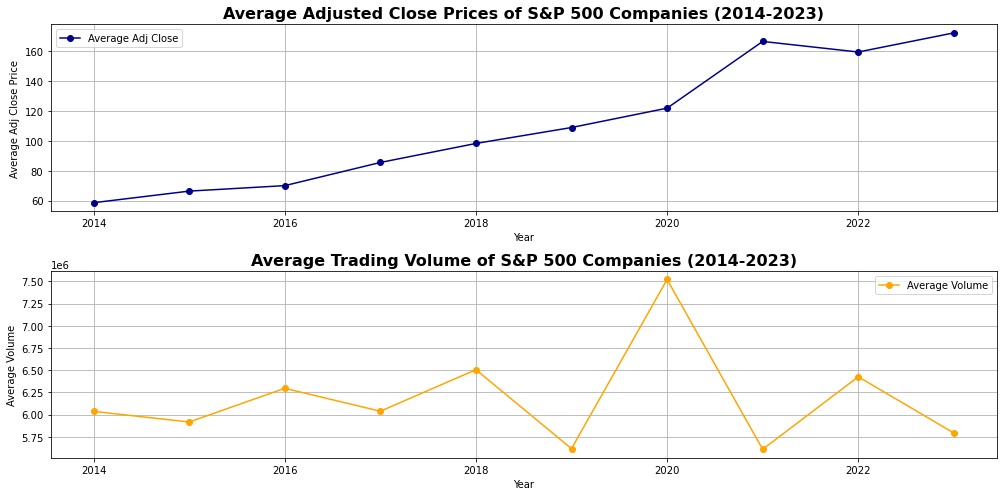

In [30]:
# Convert the 'Date' column to datetime format
SP500_Stocks['Date'] = pd.to_datetime(SP500_Stocks['Date'], format='%Y-%m-%d')

# Filter the data for the last 10 years (2014-2023) and make an explicit copy
filtered_stocks_data = SP500_Stocks[(SP500_Stocks['Date'] >= '2014-01-01') & (SP500_Stocks['Date'] <= '2023-12-31')].copy()

# Create the 'Year' column using .loc[] to avoid the SettingWithCopyWarning
filtered_stocks_data['Year'] = filtered_stocks_data['Date'].dt.year

# Group by year and calculate the mean 'Adj Close' and 'Volume' for each year
yearly_stocks_data = filtered_stocks_data.groupby('Year').agg({'Adj Close': 'mean', 'Volume': 'mean'}).reset_index()

# Plot the trends
plt.figure(figsize=(14, 7))

# Plot for Adjusted Close prices
plt.subplot(2, 1, 1)
plt.plot(yearly_stocks_data['Year'], yearly_stocks_data['Adj Close'], marker='o', color='darkblue', label='Average Adj Close')
plt.title('Average Adjusted Close Prices of S&P 500 Companies (2014-2023)', weight='bold').set_fontsize('16')
plt.xlabel('Year')
plt.ylabel('Average Adj Close Price')
plt.grid(True)
plt.legend()

# Plot for Trading Volumes
plt.subplot(2, 1, 2)
plt.plot(yearly_stocks_data['Year'], yearly_stocks_data['Volume'], marker='o', color='orange', label='Average Volume')
plt.title('Average Trading Volume of S&P 500 Companies (2014-2023)', weight='bold').set_fontsize('16')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Trends in stock prices and trading volumes insights
- **Average Adjusted Close Prices**
    - There is a clear upward trend in the average adjusted close prices of S&P 500 companies over the last decade.
    - On average, the stock prices of S&P 500 companies have been steadily increasing over the years.
    - The rise is relatively consistent, with notable increases around 2016-2020 and a sharp increase in 2021.
    - The data suggests strong growth and recovery, especially in the years following the initial impact of the COVID-19 pandemic in 2020.

- **Average Trading Volume**
    - The average trading volume shows more fluctuation rather than a consistent trend.
    - The trading volume peaks significantly around 2020, which aligns with the onset of the COVID-19 pandemic. This period was marked by high market volatility, leading to increased trading activity.
    - After 2020, trading volumes seem to fluctuate, with a notable dip in 2021, followed by a peak in 2022, and another dip in 2023.
    - This pattern indicates that while the prices were generally rising, the interest and activity in trading S&P 500 stocks varied possibly reflecting market responses to various events.

## 4.2. <a id="quest2">Performance of the S&P 500 Index</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
Question 2: What are the historical performance and growth trends of the S&P 500 index as a whole over the last 10 years (2014-2023)?

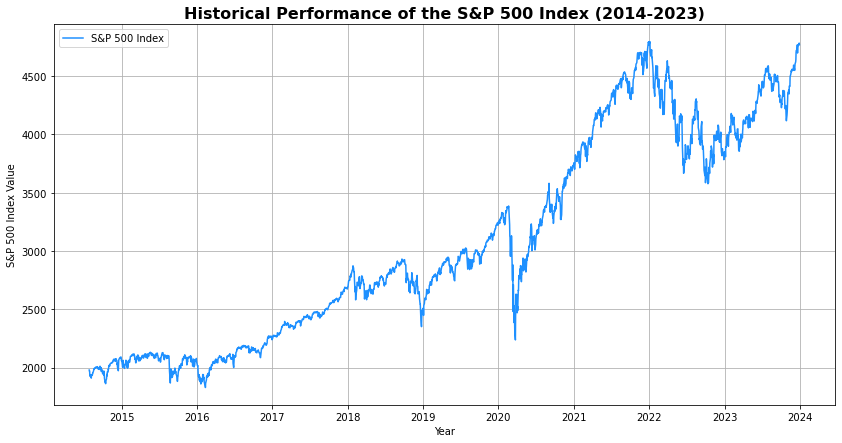

In [31]:
# Convert the 'Date' column to datetime format in the sp500_index dataset
SP500_Index['Date'] = pd.to_datetime(SP500_Index['Date'])

# Filter the data for the last 10 years (2014-2023)
filtered_index_data = SP500_Index[(SP500_Index['Date'] >= '2014-01-01') & (SP500_Index['Date'] <= '2023-12-31')]

# Save the filtered SP500 Stocks data to a CSV file
filtered_index_data.to_csv('filtered_sp500_index.csv', index=False)

# Plotting the historical performance of the S&P 500 index over the last 10 years
plt.figure(figsize=(14, 7))
plt.plot(filtered_index_data['Date'], filtered_index_data['S&P500'], color='dodgerblue', label='S&P 500 Index')

# Adding titles and labels
plt.title('Historical Performance of the S&P 500 Index (2014-2023)', weight='bold').set_fontsize('16')
plt.xlabel('Year')
plt.ylabel('S&P 500 Index Value')
plt.grid(True)
plt.legend()

plt.show()

### Performance and Growth Trends of the S&P 500 Index Insights

**Steady Growth**: The S&P 500 index has shown a consistent upward trend over the past decade, indicating overall growth in the market. This growth reflects the increasing value of the companies within the S&P 500.

**Volatility**: There are noticeable dips in the index, particularly around 2020 (due to the COVID-19 pandemic), and 2022. These dips correspond to periods of market volatility but are followed by recoveries, demonstrating the resilience of the market.

**Significant Recovery**: The sharp recovery after the 2020 dip is particularly noteworthy, indicating strong market performance in the years following the initial impact of the pandemic.

## 4.3. <a id="quest3">Growth Trends by Sectors</a><font size='3'> [[Table of contents🔝]](#index)]<font size>
Question 3: Which sectors have shown the most consistent growth?<br> 
    
The code below is referred from the notebook [Which stocks should I invest in?](https://www.kaggle.com/code/dhimananubhav/which-stocks-should-i-invest-in) by Anubhav Dhiman.  

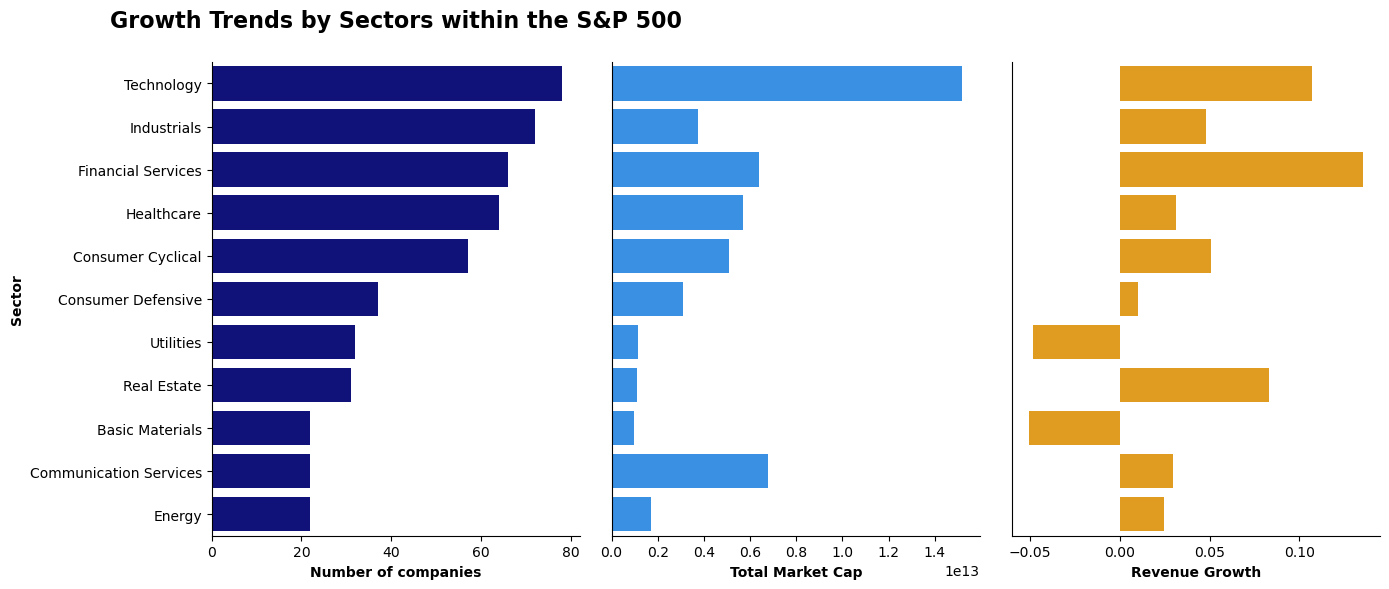

In [32]:
# This dictionary f defines the aggregation functions to be applied to each column when grouping the data
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

# groups the data by the Sector column and applies the aggregation functions defined in f
sector_breakdown = SP500_Comp.groupby('Sector').agg(f)

# The aggregation creates a MultiIndex for the column names. 
# This line flattens the MultiIndex by selecting the first level (e.g., 'Revenuegrowth', 'Marketcap', 'Longname').
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)

# Converts the index of the grouped DataFrame (Sector) back into a regular column.
sector_breakdown = sector_breakdown.reset_index()

# The data is sorted by the Longname column (which represents the number of companies) in descending order.
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, color='darkblue')
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('Growth Trends by Sectors within the S&P 500\n', weight='bold').set_fontsize('16')

plt.subplot(1, 3, 2) 
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, color='dodgerblue')
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, color='orange')
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

# Removes the top and right spines (borders) from the plots
sns.despine()
# Adjusts the layout to ensure that subplots fit nicely within the figure area without overlapping.
plt.tight_layout();

### Performance and Growth Trends by Sectors Insights

**Most represented sectors within the S&P 500**: Technology sector having the most companies, followed by Industrials and Financial Services.
<br>

**Financial weight of each sector within the index**: The Technology sector stands out with the highest market cap, indicating its significant contribution to the overall S&P 500 market value.<br>

**Growth potential and economic health by sectors**: Sectors like Technology and Industrials have higher revenue growth, while sectors like Utilities and Energy have lower or even negative growth.<br>

**Sectors with the best growth opportunities**: Investors looking for growth might focus on sectors like Technology and Industrials, which not only have a large number of companies and high market cap but also demonstrate strong revenue growth.<br>

**Is There a Correlation Between the Number of Companies and Market Cap?**:The visualization suggests that some sectors (like Technology) have both a large number of companies and a high market cap, while others (like Communication Services) have fewer companies but still maintain a significant market cap.

## 4.4. <a id="quest4">Industries Performance vs Overall S&P 500 Index</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
Question 4: How do specific industries within the S&P 500 perform compared to the overall index?

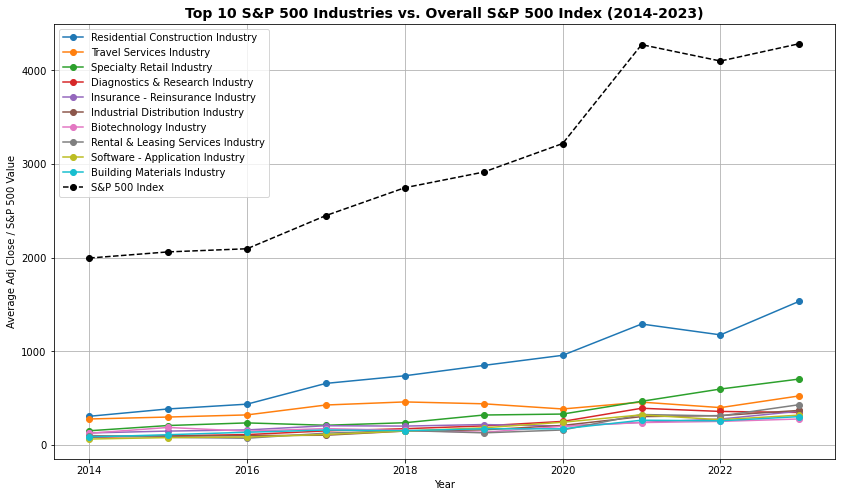

In [34]:
# Merge Data: Combine stock prices with company information
merged_data = pd.merge(filtered_stocks_data, SP500_Comp, on='Symbol')

# Convert the 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Calculate Industry Performance: Calculate the average performance of each industry per year
merged_data['Year'] = merged_data['Date'].dt.year
industry_performance = merged_data.groupby(['Year', 'Industry'])['Adj Close'].mean().reset_index()

# Fix the warning by creating a copy of the DataFrame
filtered_index_data = filtered_index_data.copy()
filtered_index_data['Year'] = filtered_index_data['Date'].dt.year

# Calculate overall S&P 500 index performance per year
index_performance = filtered_index_data.groupby('Year')['S&P500'].mean().reset_index()

# Merge industry performance with the S&P 500 index performance
comparison_data = pd.merge(industry_performance, index_performance, on='Year', how='left')

# Displaying merged data for top 10 industries based on their overall average performance
industry_avg_performance = comparison_data.groupby('Industry')['Adj Close'].mean().reset_index()
top_10_industries = industry_avg_performance.nlargest(10, 'Adj Close')['Industry'].tolist()

# Plot of Top 10 S&P 500 Industries vs. Overall S&P 500 Index (2014-2023)
plt.figure(figsize=(14, 8))

for industry in top_10_industries:
    industry_data = comparison_data[comparison_data['Industry'] == industry]
    plt.plot(industry_data['Year'], industry_data['Adj Close'], marker='o', label=f'{industry} Industry')

plt.plot(comparison_data['Year'].unique(), comparison_data.groupby('Year')['S&P500'].mean(), marker='o', color='black', linestyle='--', label='S&P 500 Index')

plt.title('Top 10 S&P 500 Industries vs. Overall S&P 500 Index (2014-2023)', weight='bold').set_fontsize('14')
plt.xlabel('Year')
plt.ylabel('Average Adj Close / S&P 500 Value')
plt.grid(True)
plt.legend()
plt.show()

### General trends insights
- **Upward Trend**: Most industries and the overall S&P 500 index show an upward trajectory from 2014 to 2023, indicating growth over the period.
- **Varied Growth Rates**: While all industries exhibit growth, the rates differ significantly. Some industries, like Travel Services, Residential Construction, and Specialty Retail, experienced rapid growth, surpassing the overall S&P 500 index. Others, such as Software Application and Insurance-Reinsurance, grew at a slower pace, often mirroring the broader market.

**Specific industry performance**:
- **Residential Construction**: These industry saw the most substantial growth, with their values increasing significantly compared to the S&P 500 index. 

**Comparison to S&P 500 Index**:
- **Outperforming Industries**: Several industries, particularly Residential Construction and Travel Services, consistently outperformed the S&P 500 index, suggesting they were less affected by broader market fluctuations.

## 4.5. <a id="quest5">Market capitalization and revenue growth correlation with long-term stock performance</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
Question 5: How does the market capitalization and revenue growth of S&P 500 companies correlate with long-term stock performance?

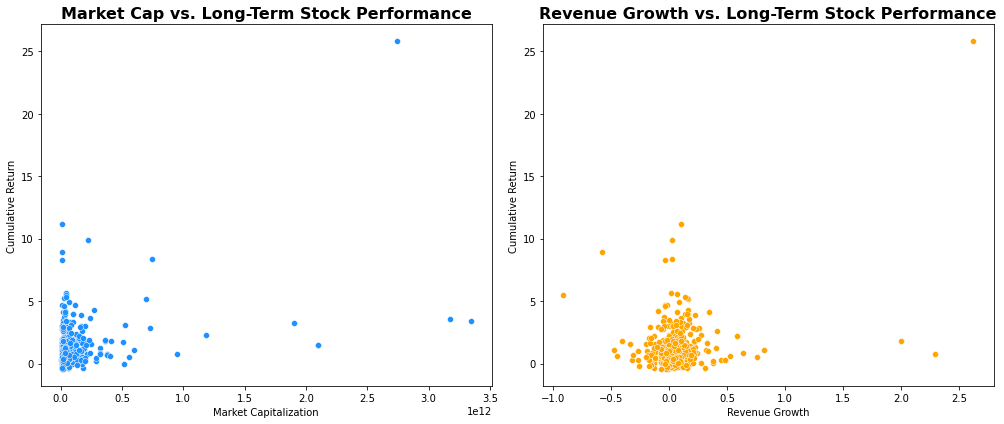

Correlation Matrix:
                   Marketcap  Revenuegrowth  Cumulative Return
Marketcap           1.000000       0.247180           0.372838
Revenuegrowth       0.247180       1.000000           0.313168
Cumulative Return   0.372838       0.313168           1.000000


In [35]:
# 1) Calculate Long-Term Stock Performance
# Group by Symbol and calculate cumulative return for each company
merged_data.sort_values(by=['Symbol', 'Date'], inplace=True)
# Calculating the cumulative return for each company over the period (from the first available date to the last)
# using the adjusted close price.
merged_data['Cumulative Return'] = merged_data.groupby('Symbol')['Adj Close'].apply(lambda x: x / x.iloc[0] - 1)

# Calculate the mean cumulative return for each company over the period
company_performance = merged_data.groupby('Symbol')['Cumulative Return'].mean().reset_index()

# Merge the cumulative return with company information
company_data = pd.merge(company_performance, SP500_Comp, on='Symbol')

# 2) Correlation Analysis
# Calculate correlation between market capitalization, revenue growth, and long-term stock performance
correlation_matrix = company_data[['Marketcap', 'Revenuegrowth', 'Cumulative Return']].corr()

# 3) Visualization
# Scatter plots for Market Cap vs. Long-Term Performance and Revenue Growth vs. Long-Term Performance

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Marketcap', y='Cumulative Return', color='dodgerblue', data=company_data)
plt.title('Market Cap vs. Long-Term Stock Performance', weight='bold').set_fontsize('16')
plt.xlabel('Market Capitalization')
plt.ylabel('Cumulative Return')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Revenuegrowth', y='Cumulative Return', color='orange', data=company_data)
plt.title('Revenue Growth vs. Long-Term Stock Performance', weight='bold').set_fontsize('16')
plt.xlabel('Revenue Growth')
plt.ylabel('Cumulative Return')

plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

### Market capitalization and revenue growth correlation insights

- **Moderate Positive Correlations**: 
Both market capitalization (0.37) and revenue growth (0.31) are positively correlated with long-term cumulative returns. This implies that companies with larger market caps and higher revenue growth tend to have better long-term performance, but these factors are not strongly predictive on their own.


- **Outliers and Variability**: 
    - The scatter plot for market cap shows some outliers with very high cumulative returns despite having smaller market caps. This indicates that smaller companies can still achieve significant growth, making them potential high-risk, high-reward opportunities.
    - The revenue growth scatter plot also shows outliers with exceptionally high returns, which suggests that companies with very high revenue growth can achieve superior long-term performance, though they may be rarer.

In summary, while market capitalization and revenue growth are important factors in determining long-term stock performance, they are not definitive predictors. A more comprehensive approach, considering these alongside other financial and market factors, would likely yield better investment decisions.

## 4.6. <a id="quest6">Top-performing companies </a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
Question 6: What are the top-performing companies in terms of revenue growth and market capitalization for the last 10 years (2014-2023)?

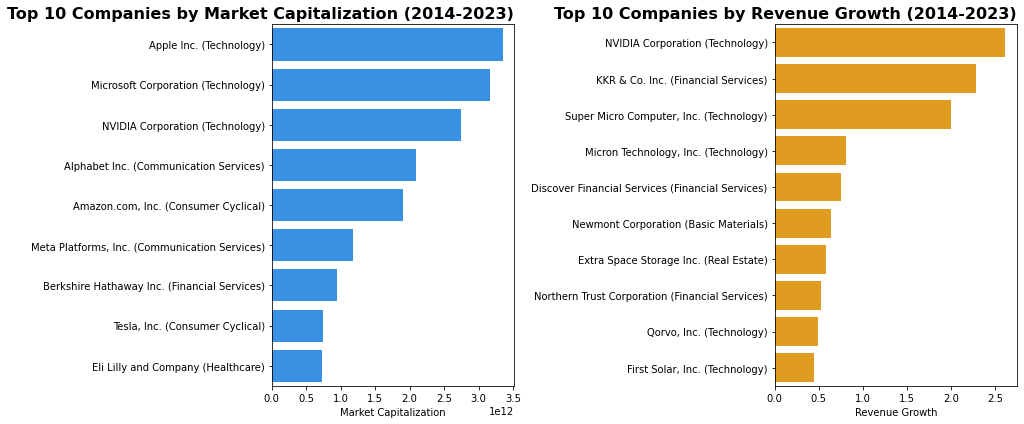

In [36]:
# Sort the companies by Revenue Growth and Market Capitalization
top_revenue_growth = company_data.sort_values(by='Revenuegrowth', ascending=False).head(10)
top_market_cap = company_data.sort_values(by='Marketcap', ascending=False).head(10)

# Add a new column that combines company name and sector
top_revenue_growth['Company_Sector'] = top_revenue_growth['Longname'] + ' (' + top_revenue_growth['Sector'] + ')'
top_market_cap['Company_Sector'] = top_market_cap['Longname'] + ' (' + top_market_cap['Sector'] + ')'

# Plot Top 10 Companies by Market Capitalization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Marketcap', y='Company_Sector', data=top_market_cap, color='dodgerblue')
plt.title('Top 10 Companies by Market Capitalization (2014-2023)', weight='bold', loc='right').set_fontsize('16')
plt.xlabel('Market Capitalization')
plt.ylabel('')  


# Plot Top 10 Companies by Revenue Growth
plt.subplot(1, 2, 2)
sns.barplot(x='Revenuegrowth', y='Company_Sector', data=top_revenue_growth, color='orange')
plt.title('Top 10 Companies by Revenue Growth (2014-2023)', weight='bold', loc='right').set_fontsize('16')
plt.xlabel('Revenue Growth')
plt.ylabel('')  # Hides the ylabel

plt.tight_layout()
plt.show()

### Top-performing companies insights 

- **Dominance of the Technology Sector**
    - Market Capitalization: Companies like Apple, Microsoft, and NVIDIA lead the list, indicating that technology companies have been the most valuable in terms of market cap over the past decade.
    - Revenue Growth: companies like NVIDIA, Super Micro Computer, Micron Technology showing significant growth that suggests that technology companies not only have large market caps but are also rapidly expanding their revenues.

- **Importance of the Communication Services Sector**
    - Companies like Alphabet (Google) and Meta Platforms (Facebook) rank high in market capitalization, showing the significant role that these digital advertising and social media companies play in the modern economy.
    
- **Financial Services Sector**
    - Berkshire Hathaway represents the Financial Services sector in the top 10 by market capitalization and indicates the strength and stability of large financial firms in the market.

## 4.7. <a id="quest7">Risk profiles of top-performing companies </a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
Question 7: What are the historical volatility and risk profiles of top-performing companies?

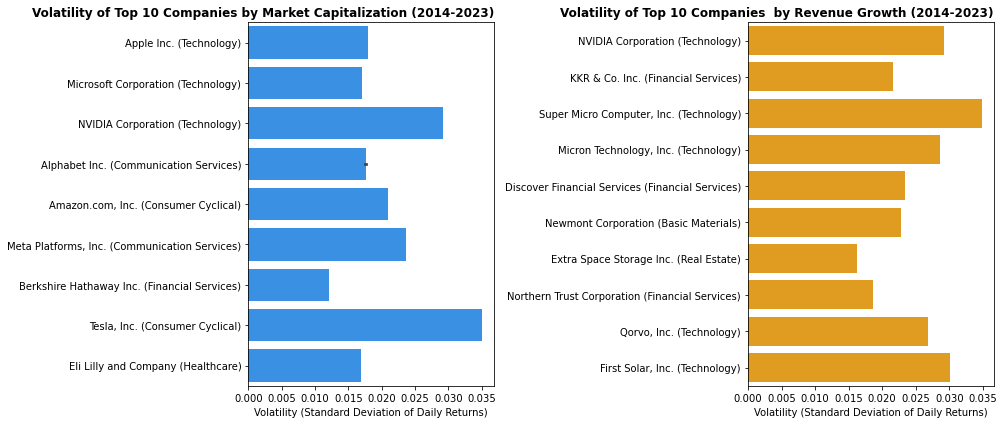

In [37]:
# 1) Calculate Daily Returns and Volatility

# Calculate percentage change in adjusted close prices
merged_data['Daily Return'] = merged_data.groupby('Symbol')['Adj Close'].pct_change()

# Calculate historical volatility as the standard deviation of daily returns for each company. 
# This is a common measure of risk, indicating how much the stock price varies on a daily basis.
volatility = merged_data.groupby('Symbol')['Daily Return'].std().reset_index()
volatility.columns = ['Symbol', 'Volatility']

# Merge volatility data with the top-performing companies
top_revenue_growth = pd.merge(top_revenue_growth, volatility, on='Symbol')
top_market_cap = pd.merge(top_market_cap, volatility, on='Symbol')

# 2) Plotting Historical Volatility for Top-Performing Companies

# Plot Top 10 Companies by Market Capitalization with Volatility
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Volatility', y='Company_Sector', data=top_market_cap, color='dodgerblue')

plt.title('Volatility of Top 10 Companies by Market Capitalization (2014-2023)', weight='bold', loc='right').set_fontsize('12')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('')  

# Plot Top 10 Companies by Revenue Growth with Volatility
plt.subplot(1, 2, 2)
sns.barplot(x='Volatility', y='Company_Sector', data=top_revenue_growth, color='orange')
plt.title('Volatility of Top 10 Companies  by Revenue Growth (2014-2023)', weight='bold', loc='right').set_fontsize('12')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('')  

plt.tight_layout()
plt.show()


### Risk profiles of top-performing companies insights

- **Volatility in Top Companies by Market Capitalization**
    - Companies Apple and Microsoft show relatively low volatility. This suggests that these established tech giants have stable stock prices with less day-to-day fluctuation, making them potentially lower-risk investments within the technology sector.
    - NVIDIA, while also a tech giant, shows higher volatility compared to Apple and Microsoft. This might be due to its focus on high-growth areas like GPUs, AI, and gaming, which tend to have more market fluctuations.
    - Tesla, a leader in a industry of electric vehicles, is more volatile than the other top market cap companies. Ils might indicate investor uncertainty or high expectations around innovation and growth.
    - Berkshire Hathaway (Financial Services) show lower volatility, indicating more stable stock prices.
- **Volatility in Top Companies by Revenue Growth**
    - Companies like Super Micro Computer and Micron Technology exhibit higher volatility. This indicates that while these companies are growing rapidly in terms of revenue, their stock prices are more susceptible to fluctuations.
    - Financial services companies like KKR & Co. Inc. and Discover Financial Services also show significant volatility, reflecting the sensitivity of financial stocks to market conditions and interest rates.
- **Sector-Specific Observations**
    - The technology sector dominates both lists, but the range of volatility within this sector is broad, while newer, high-growth tech firms are more volatile.
    - The inclusion of companies from Financial Services, Real Estate, and Basic Materials sectors indicates that high-growth opportunities exist across different sectors, not just in technology.

In [38]:
merged_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Exchange,...,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight,Ebitda_missing,Cumulative Return,Daily Return
22644,2014-01-02,A,37.446896,40.207439,40.844063,40.164520,40.844063,2678848.0,2014,NYQ,...,1.612000e+09,-0.084,Santa Clara,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000787,False,0.000000,NaN
22645,2014-01-03,A,37.919888,40.715309,41.022888,40.243206,40.336197,2609647.0,2014,NYQ,...,1.612000e+09,-0.084,Santa Clara,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000787,False,0.012631,0.012631
22646,2014-01-06,A,37.733356,40.515022,41.273247,40.457798,41.058655,2484665.0,2014,NYQ,...,1.612000e+09,-0.084,Santa Clara,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000787,False,0.007650,-0.004919
22647,2014-01-07,A,38.272972,41.094421,41.223175,40.722462,40.736767,2045554.0,2014,NYQ,...,1.612000e+09,-0.084,Santa Clara,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000787,False,0.022060,0.014301
22648,2014-01-08,A,38.899185,41.766811,41.874107,40.894135,41.008583,3717981.0,2014,NYQ,...,1.612000e+09,-0.084,Santa Clara,United States,17600.0,"Agilent Technologies, Inc. provides applicatio...",0.000787,False,0.038783,0.016362


## 4.8. <a id="quest8">Impact of Market Weight on Returns </a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
Question 8: How does a company’s weight in the S&P 500 influence its long-term returns? Do higher-weight companies tend to perform better?

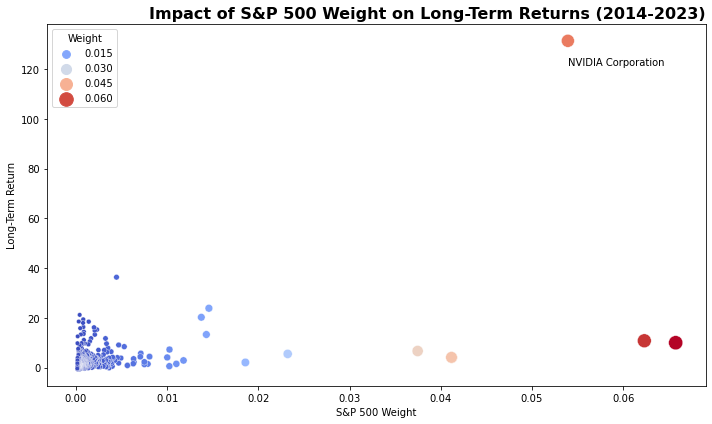

Correlation Matrix:
                    Weight  Long_Term_Return
Weight            1.000000          0.435183
Long_Term_Return  0.435183          1.000000


In [39]:
# 1) Calculate Long-Term Performance
# Long-term performance calculated by percentage change in Adj Close price from the beginning to the end of the period.
long_term_performance = merged_data.groupby('Symbol')['Adj Close'].apply(lambda x: (x.iloc[-1] / x.iloc[0]) - 1).reset_index()
# Renaming the calculated column
long_term_performance.columns = ['Symbol', 'Long_Term_Return']

# 2) Merge Long-Term Returns with S&P 500 Weight Data
# Merge the weight data from sp500_companies with long-term returns
weight_performance_data = pd.merge(SP500_Comp[['Symbol', 'Weight', 'Longname']], long_term_performance, on='Symbol')

# 3) Identify the Outlier
# Find the company with the maximum long-term return among heavily-weighted companies
outlier = weight_performance_data.loc[weight_performance_data['Long_Term_Return'].idxmax()]

# 4) Plotting the Impact of S&P 500 Weight on Long-Term Returns

plt.figure(figsize=(10, 6))

# Scatter plot to show the relationship between weight and long-term returns
scatter = sns.scatterplot(x='Weight', y='Long_Term_Return', data=weight_performance_data, hue='Weight', palette='coolwarm', size='Weight', sizes=(20, 200))

# Annotating the outlier under its point
plt.text(outlier['Weight'], outlier['Long_Term_Return'] - 10, outlier['Longname'])

# Move the legend to the upper left corner
plt.legend(loc='upper left', title='Weight')

plt.title('Impact of S&P 500 Weight on Long-Term Returns (2014-2023)', weight='bold', loc='right').set_fontsize('16')
plt.xlabel('S&P 500 Weight')
plt.ylabel('Long-Term Return')

plt.tight_layout()
plt.show()

# 5) Correlation Matrix
# Calculate the correlation between Weight and Long-Term Return
correlation_matrix = weight_performance_data[['Weight', 'Long_Term_Return']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

### Impact of Market Weight on Returns Insights

- **Positive correlation**: There's a moderate positive correlation (0.435183) between S&P 500 weight and long-term returns. This suggests that as a company's weight in the S&P 500 increases, its long-term returns tend to increase as well.
- **Concentration of low-weight stocks**: The majority of stocks are clustered at the lower left of the plot, indicating that most companies in the S&P 500 have relatively low weights (below 0.02) and lower long-term returns (below 40%).
- **Outlier performance**: There's a notable outlier, NVIDIA Corporation, with a weight around 0.05 and an exceptionally high long-term return of about 130% significantly outperformed others over the period.
- **Non-linear relationship**: The relationship between weight and returns doesn't appear to be strictly linear, suggesting other factors likely influence long-term performance.

# 5. <a id="summary">Summary</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>

- The S&P 500 index and its stocks have shown a consistent upward trend in adjusted close prices, reflecting robust growth and recovery, particularly in the aftermath of the COVID-19 pandemic.
- The Technology sector has emerged as the dominant performer, both in terms of market capitalization and revenue growth, highlighting its pivotal role in driving overall market value. 
- While most industries within the S&P 500 have shown growth, there are notable differences in growth rates. Industries like Residential Construction and Travel Services have outperformed the broader market, suggesting potential areas for targeted investment.
- The analysis of risk profiles indicates that companies with high market caps, such as Apple and Microsoft, generally exhibit lower volatility, making them potentially lower-risk investments. In contrast, companies like Tesla and NVIDIA show higher volatility, reflecting market uncertainties and high growth expectations.
- Overall, these insights provide valuable guidance for long-term investors looking to make informed decisions based on historical trends, sectoral performance, and risk profiles within the S&P 500.
